In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [5]:
df_main = pd.read_csv('crime_data.csv')
df_main.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df_main.shape

(50, 5)

In [7]:
df_main.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
sum(df_main.duplicated())

0

In [9]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
df_main.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [11]:
df = df_main.drop('Unnamed: 0', axis=1)

In [12]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [13]:
df.iplot(kind='box')

In [14]:
df1 = pd.DataFrame(df.sum()).reset_index()
df1.columns = ["Crime", "Total"]
df1

,Crime,Total
0,Murder,389.4
1,Assault,8538.0
2,UrbanPop,3277.0
3,Rape,1061.6


In [15]:
fig = px.pie(df1, values='Total', names='Crime', title="Crime Rate", color_discrete_sequence=px.colors.sequential.Bluyl_r)
fig.show()

In [16]:
fig = px.bar(df1, x='Crime', y='Total', title="Crime Rate")
fig.show()

In [17]:
plt.scatter(df['Murder'], df['Assault'], df['Rape'], df['UrbanPop'])

### Data Transform

In [19]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df)
df_scaler

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

### Hierarchical Clustering

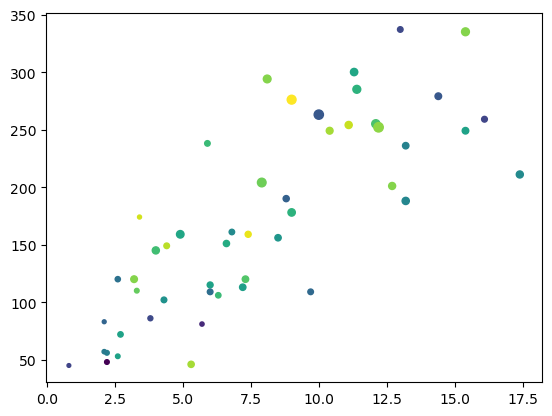

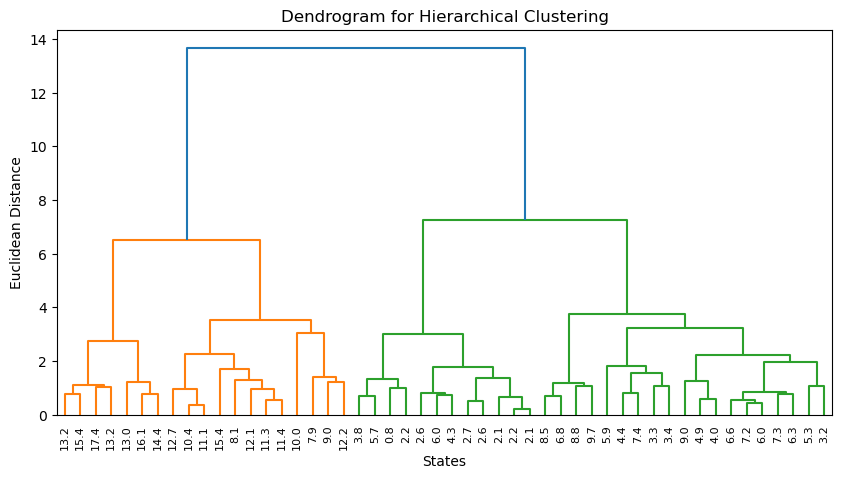

In [21]:
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(df_scaler, method='ward')
dendrogram(linkage_matrix, labels=df.iloc[:, 0].values, leaf_rotation=90)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('States')
plt.ylabel('Euclidean Distance')
plt.show()

### K Means

In [23]:
# Deciding the number of clusters from the dendrogram
num_clusters = 4  # Adjust based on dendrogram observation
hierarchical_clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
df['Hierarchical Cluster'] = hierarchical_clusters
df.head()

,Murder,Assault,UrbanPop,Rape,Hierarchical Cluster
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,4
4,9.0,276,91,40.6,2


In [24]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(df_scaler)
df['KMeans Cluster'] = kmeans_clusters

### DBSCAN Clustering

In [26]:
dbscan = DBSCAN(eps=1.5, min_samples=3)  # Adjust hyperparameters if needed
dbscan_clusters = dbscan.fit_predict(df_scaler)
df['DBSCAN Cluster'] = dbscan_clusters

### Scatter plot for KMeans Clustering

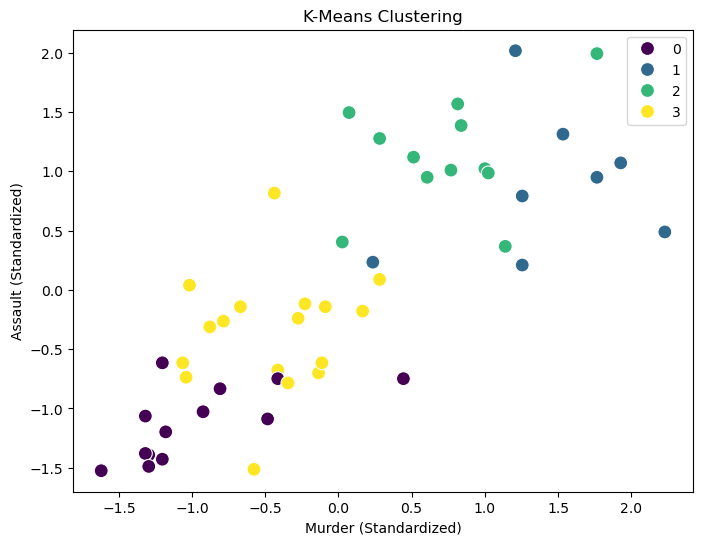

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaler[:, 0], y=df_scaler[:, 1], hue=kmeans_clusters, palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Murder (Standardized)')
plt.ylabel('Assault (Standardized)')
plt.show()